# Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from scipy.stats import shapiro

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Load Data

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Get Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.describe(include='O').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


# Check null Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values in our dataset that means our dataset is clean

# Data Analysis

# Univariant Analysis

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


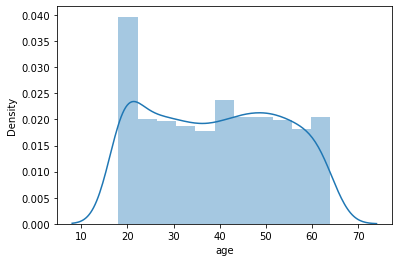

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


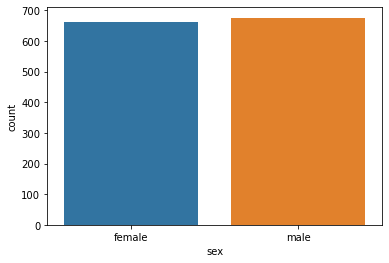

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


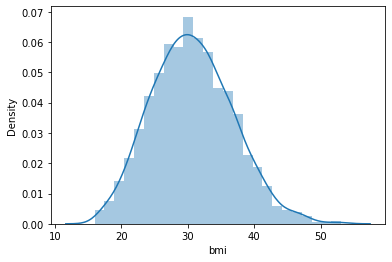

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


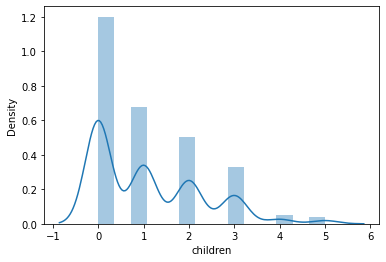

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


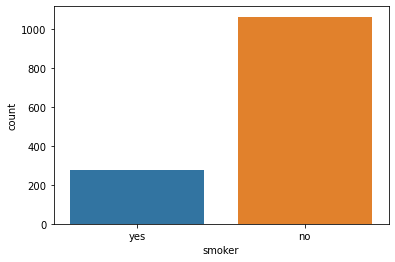

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


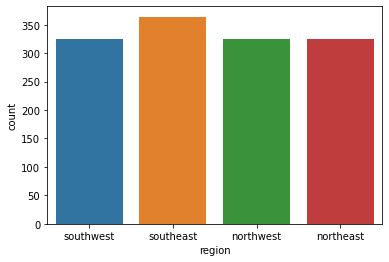

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


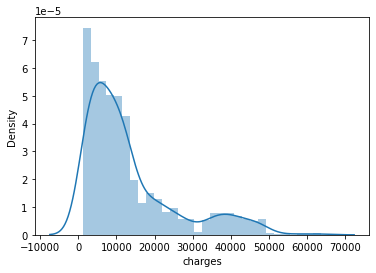

In [7]:
def univariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.distplot(frame[i])
            plt.show()
                
        elif(frame[i].dtype == 'float64'):
            sns.distplot(frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'O'):
            sns.countplot(frame[i])
            plt.show()
            
univariant(df)

# Bivariant Analysis

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


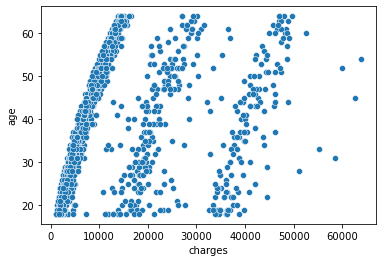

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


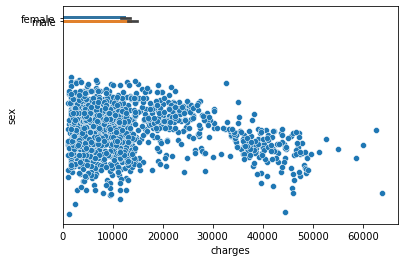

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


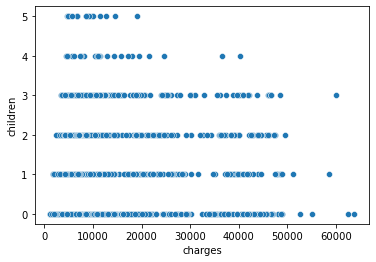

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


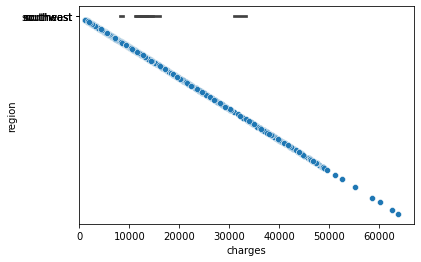

In [8]:
def target(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.scatterplot(df['charges'], frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.scatterplot(df['charges'], frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'O'):
            sns.barplot(x=df['charges'], y=frame[i])
            
target(df)

# Detecting Outliers

age
[18.   18.   18.   18.   18.   18.   19.   19.   19.   19.   19.   20.
 20.   21.   21.   22.   22.   23.   23.   24.   24.   25.   25.   26.
 26.   27.   27.   27.   28.   28.   29.   29.   30.   30.   31.   31.
 32.   32.   33.   33.   34.   34.17 35.   36.   36.   37.   37.   38.
 38.   39.   39.   40.   40.   41.   41.   42.   42.   43.   43.   44.
 44.   45.   45.   46.   46.   47.   47.   47.79 48.   48.   49.   49.
 50.   50.   51.   51.   52.   52.   53.   53.   54.   54.   55.   55.
 56.   56.   57.   57.   58.   58.   59.   59.   60.   60.   61.   62.
 62.   63.   63.   64.   64.  ]


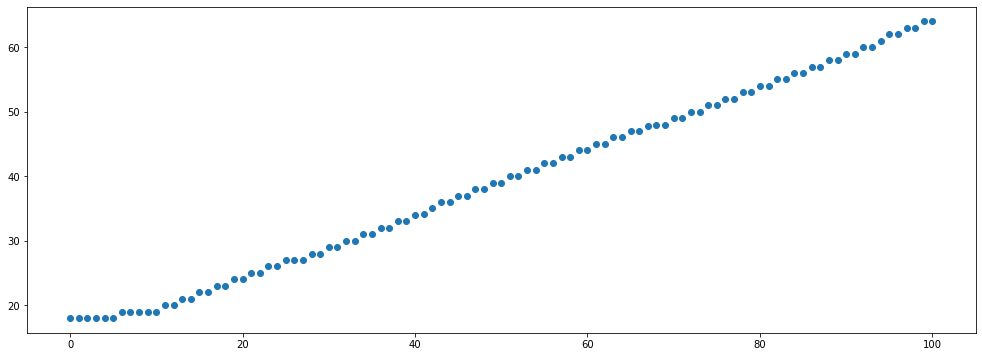

bmi
[15.96    17.89515 19.2714  19.96045 20.52    21.256   21.66    21.8736
 22.3     22.61    22.99    23.21    23.498   23.7405  23.9899  24.26625
 24.4138  24.605   24.8798  25.175   25.326   25.54695 25.7407  25.84
 26.03    26.29625 26.41    26.69425 26.84    27.1     27.36    27.5
 27.6394  27.7242  27.835   28.      28.12    28.31    28.5     28.6387
 28.797   28.9     29.07    29.355   29.6     29.735   29.83    29.925
 30.1114  30.2013  30.4     30.5     30.69    30.8     30.9994  31.1405
 31.35    31.5036  31.73    31.825   32.032   32.205   32.3     32.4931
 32.7     32.9     33.0768  33.19055 33.345   33.535   33.66    33.88
 34.1     34.21    34.4     34.69375 34.8656  35.2     35.4909  35.7046
 35.86    36.08    36.3     36.6213  36.85    37.05    37.18    37.4452
 38.      38.17    38.6195  39.1534  39.5232  39.8528  40.3546  41.106
 41.8     42.4534  43.9186  46.4079  53.13   ]


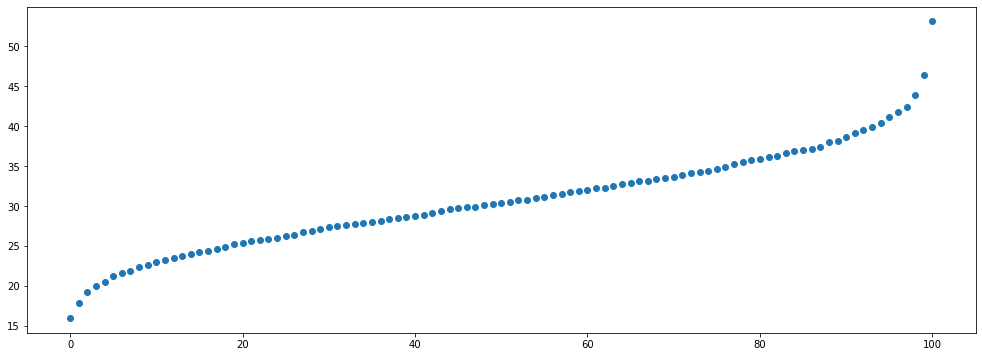

children
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 4. 4. 5. 5.]


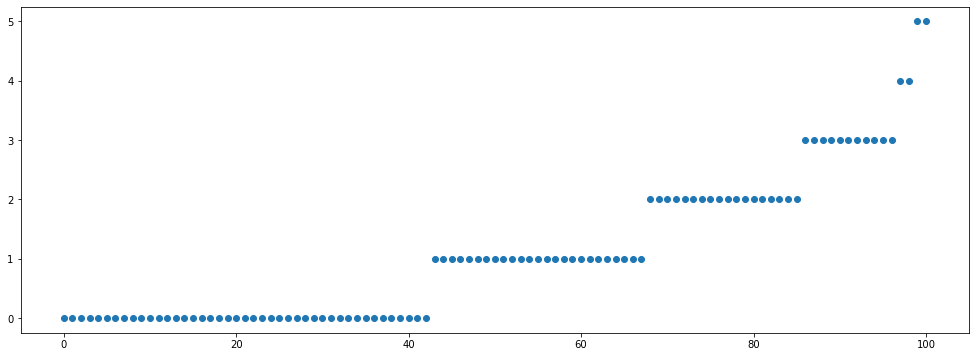

charges
[ 1121.8739     1252.97273    1621.74165    1636.1548895  1709.934254
  1757.7534     1907.055474   2020.398427   2138.054016   2208.830439
  2346.533615   2484.45602    2659.848052   2752.5370895  2905.79458
  3171.836605   3279.651946   3474.442536   3596.431449   3861.3790165
  3991.57572    4177.261984   4349.609336   4451.9817315  4564.029528
  4740.28715    4881.629719   5012.38482    5245.522136   5376.804454
  5484.84677    5794.5937165  5987.956826   6196.931798   6360.062397
  6545.7970925  6672.703256   6870.541766   7144.997191   7225.120892
  7369.05273    7623.70704    7741.294312   8062.486359   8256.977016
  8437.557805   8557.166096   8715.0675675  8941.227636   9183.686905
  9382.033      9566.475853   9780.871688   9939.2505175 10156.47026
 10427.16866   10601.57058   10854.956201  11071.74986   11284.1234573
 11399.85716   11571.9033365 11833.591794  11944.7612385 12198.601564
 12406.1828125 12633.381986  12928.181029  13127.14561   13422.456669
 13767.87534

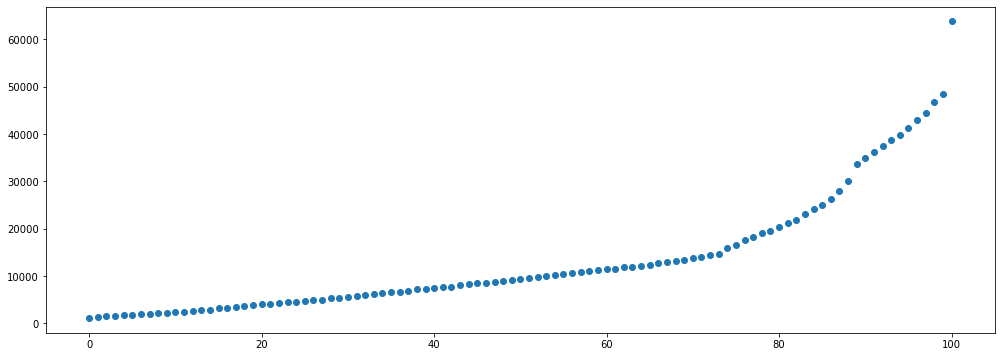

In [9]:
def detect_outlier(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            print(i)
            plt.figure(figsize=(17,6))
            plt.scatter(y=np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)),x = np.arange(0,101,1))
            print(np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)))
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            print(i)
            plt.figure(figsize=(17,6))
            plt.scatter(y=np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)),x = np.arange(0,101,1))
            print(np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)))
            plt.show()
            
detect_outlier(df)

In [10]:
df['bmi'].where(~(df.bmi == 53.13), 47.0000)

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

# Encode Categorical Variables

In [11]:
df2 = pd.get_dummies(df, drop_first=True)

# Split Data Into Train and Test

In [12]:
x = df2.drop('charges', axis=1)
y = df2['charges']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# Lets Build Models

# 1. Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
mean_squared_error(Y_test, lr_pred, squared=False)

6063.12265685045

# 2. Random Forest Regressor

In [15]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
mean_squared_error(Y_test, rf_pred, squared=False)

4906.310149893232

# 3. Gradient Boosting Regressor

In [16]:
gb = GradientBoostingRegressor()
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
mean_squared_error(Y_test, gb_pred, squared=False)

4496.65783908825

# Log transformation

# Linear Regression

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

step1 = ColumnTransformer(transformers=[('dummy', OneHotEncoder(drop='first',sparse=False), [1,4,5])], remainder='passthrough')
step2 = LinearRegression()

lr_pipe = Pipeline([('step1', step1),
                   ('step2', step2)])

lr_pipe.fit(X_train, np.log(Y_train))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummy',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('step2', LinearRegression())])

In [22]:
lr_pipe_pred = lr_pipe.predict(X_test)
mean_squared_error(np.log(Y_test), lr_pipe_pred)

ValueError: Found unknown categories [16.815, 17.67, 18.05, 18.905, 19.0, 19.095, 19.3, 19.475, 20.1, 20.35, 20.4, 20.425, 20.6, 20.9, 21.12, 22.04, 22.3, 22.88, 23.0, 23.465, 23.54, 24.4, 24.415, 24.53, 24.97, 25.7, 25.85, 26.9, 27.0, 27.06, 28.49, 29.04, 29.2, 29.45, 31.24, 31.3, 31.8, 32.0, 32.01, 32.23, 32.87, 33.06, 33.2, 33.535, 33.55, 34.01, 34.3, 34.39, 34.5, 34.9, 35.1, 35.15, 35.31, 36.4, 36.52, 36.96, 37.51, 37.525, 37.905, 38.285, 38.95, 39.27, 39.425, 39.71, 40.47, 40.48, 40.66, 40.945, 42.68, 43.01, 43.34, 43.4, 45.32, 45.54, 45.9, 46.2, 46.7, 47.52, 48.07] in column 0 during transform

# Random Forest Regressor

In [ ]:
step1 = ColumnTransformer(transformers=[('dummy', OneHotEncoder(drop='first',sparse=False), [1,4,5])], remainder='passthrough')
step2 = RandomForestRegressor()

rf_pipe = Pipeline([('step1', step1),
                   ('step2', step2)])

rf_pipe.fit(X_train, np.log(Y_train))

In [ ]:
rf_pipe_pred = rf_pipe.predict(X_test)
mean_squared_error(np.log(Y_test), rf_pipe_pred)

# Gradient Boosting

In [ ]:
step1 = ColumnTransformer(transformers=[('dummy', OneHotEncoder(drop='first',sparse=False), [1,4,5])], remainder='passthrough')
step2 = GradientBoostingRegressor()

gb_pipe = Pipeline([('step1', step1),
                   ('step2', step2)])

gb_pipe.fit(X_train, np.log(Y_train))

In [ ]:
gb_pipe_pred = gb_pipe.predict(X_test)
mean_squared_error(np.log(Y_test), gb_pipe_pred)

# Feature Selection

In [ ]:
th = np.sort(gb.feature_importances_)
l = []
for g in th:
    select = SelectFromModel(gb, threshold = g, prefit = True)
    x_train = select.transform(X_train)
    model = GradientBoostingRegressor()
    model.fit(x_train, np.log(Y_train))
    x_test = select.transform(X_test)
    y_pred = model.predict(x_test)
    accuracy = mean_squared_error(np.log(Y_test), y_pred)
    print('Threshold:', g, 'Model Score:', accuracy)

In [ ]:
import pickle

pickle.dump(gb_pipe, open('gb.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))